In [67]:
import pandas as pd

# Load the dataset with encoding
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

# Check the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [1]:
pip install streamlit


  Using cached narwhals-1.36.0-py3-none-any.whl.metadata (9.2 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.8 MB 2.2 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.8 MB 3.0 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.8 MB 3.2 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/9.8 MB 3.5 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.8 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 3.9 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.8 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.8 MB 3.7 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.8 MB 3.9 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------

In [68]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [69]:
df=df.dropna(subset=['CustomerID'])
df=df[df['Quantity']>0]
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [70]:
top_products=df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_products.head(10)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
JUMBO BAG RED RETROSPOT               46181
WHITE HANGING HEART T-LIGHT HOLDER    36725
ASSORTED COLOUR BIRD ORNAMENT         35362
PACK OF 72 RETROSPOT CAKE CASES       33693
POPCORN HOLDER                        30931
RABBIT NIGHT LIGHT                    27202
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

In [71]:
def recomend_popular_products(top_products,n=5):
    print("top",n,"popular_products:")
    for product in top_products.head(n).index:
        print("-",product)
recomend_popular_products(top_products,n=5)


top 5 popular_products:
- PAPER CRAFT , LITTLE BIRDIE
- MEDIUM CERAMIC TOP STORAGE JAR
- WORLD WAR 2 GLIDERS ASSTD DESIGNS
- JUMBO BAG RED RETROSPOT
- WHITE HANGING HEART T-LIGHT HOLDER


In [72]:
customer_item_matrix=df.pivot_table(index='CustomerID',columns='Description',values='Quantity',fill_value=0)
customer_item_matrix.shape

(4339, 3877)

In [19]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 6.7 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 4.6 MB/s eta 0:00:03
   ---------- ----------------------------- 2.9/11.1 MB 4.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 3.8 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 4.1 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 4.0 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 4.0 MB/s eta 0:00:01
   --


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
from sklearn.metrics.pairwise import cosine_similarity
#transpose matrix : prodcts as rows customer as columns
item_item_matrix=customer_item_matrix.T
#calculate similarity between products
item_similarity =cosine_similarity(item_item_matrix)
#create dataframe for better readability
item_similarity_df=pd.DataFrame(item_similarity,index=item_item_matrix.index,columns=item_item_matrix.index)
#check similarty score for 1 prodct
item_similarity_df.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.000000,0.000106,0.000494,0.000000,0.000000,0.031685,0.000000,0.000272,0.134742,...,0.0,0.002012,0.028527,0.002462,0.0,0.005989,0.0,0.039433,0.00000,0.001852
50'S CHRISTMAS GIFT BAG LARGE,0.000000,1.000000,0.009123,0.004511,0.000000,0.020504,0.016775,0.918930,0.145846,0.008422,...,0.0,0.001864,0.021446,0.011945,0.0,0.014968,0.0,0.010439,0.00000,0.031379
DOLLY GIRL BEAKER,0.000106,0.009123,1.000000,0.536172,0.728505,0.017890,0.005203,0.007484,0.002644,0.186663,...,0.0,0.000174,0.009784,0.367785,0.0,0.251604,0.0,0.455050,0.00036,0.015561
I LOVE LONDON MINI BACKPACK,0.000494,0.004511,0.536172,1.000000,0.705221,0.025421,0.001529,0.004645,0.007066,0.172236,...,0.0,0.001621,0.008273,0.353233,0.0,0.239391,0.0,0.453407,0.00000,0.016661
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.728505,0.705221,1.000000,0.000000,0.000000,0.000000,0.000000,0.213768,...,0.0,0.000000,0.000000,0.490886,0.0,0.330277,0.0,0.615980,0.00000,0.000000


In [109]:
def recommend_similar_products(product_name, n=5):
    if product_name not in item_similarity_df.columns:
        print("Product not found in the database.")
        return
    print(f"\nProducts similar to '{product_name}':")
    similar_products = item_similarity_df[product_name].sort_values(ascending=False)
    similar_products = similar_products.drop(product_name).head(n)
    for item in similar_products.index:
        print("-", item)

# Example: Recommend 5 products similar to 'WHITE HANGING HEART T-LIGHT HOLDER'
recommend_similar_products('WHITE METAL LANTERN', 5)


Products similar to 'WHITE METAL LANTERN':
- 50'S CHRISTMAS GIFT BAG LARGE
- RED SPOT GIFT BAG LARGE
- LOVE HOT WATER BOTTLE
- EGG CUP HENRIETTA HEN CREAM
- WRAP, BILLBOARD FONTS DESIGN


In [110]:
'I LOVE LONDON MINI FUCKSACK' in item_similarity_df.columns # for checking product in dataset 

False

In [80]:
# for checking similar names of products
for product in item_similarity_df.columns:
    if 'I LOVE LONDON MINI RUCKSACK' in product:
        print(product)

 I LOVE LONDON MINI RUCKSACK


In [55]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905            CHILDREN'S APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908           BAKING SET 9 PIECE RETROSPOT
Name: Description, Length: 397924, dtype: object

In [107]:
recommend_similar_products("WHITE METAL LANTERN",5)


Products similar to 'WHITE METAL LANTERN':
-  50'S CHRISTMAS GIFT BAG LARGE
-  RED SPOT GIFT BAG LARGE
- LOVE HOT WATER BOTTLE
- EGG CUP HENRIETTA HEN CREAM 
- WRAP, BILLBOARD FONTS DESIGN


In [88]:
similarity_table=item_similarity_df[["WHITE METAL LANTERN"]].sort_values(by="WHITE METAL LANTERN",ascending=False)
similarity_table.head(6)

Description,WHITE METAL LANTERN
Description,
WHITE METAL LANTERN,1.000000
50'S CHRISTMAS GIFT BAG LARGE,0.624077
RED SPOT GIFT BAG LARGE,0.620879
LOVE HOT WATER BOTTLE,0.616835
EGG CUP HENRIETTA HEN CREAM,0.610485
"WRAP, BILLBOARD FONTS DESIGN",0.600567


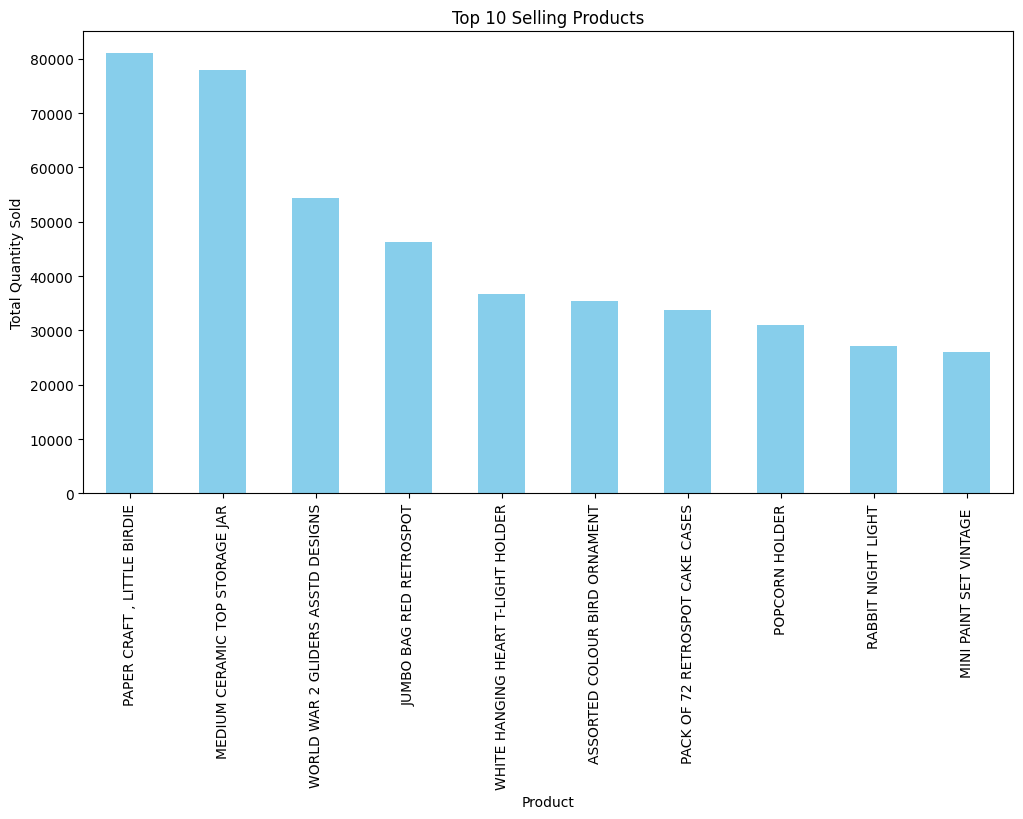

In [89]:
import matplotlib.pyplot as plt
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=90)
plt.show()

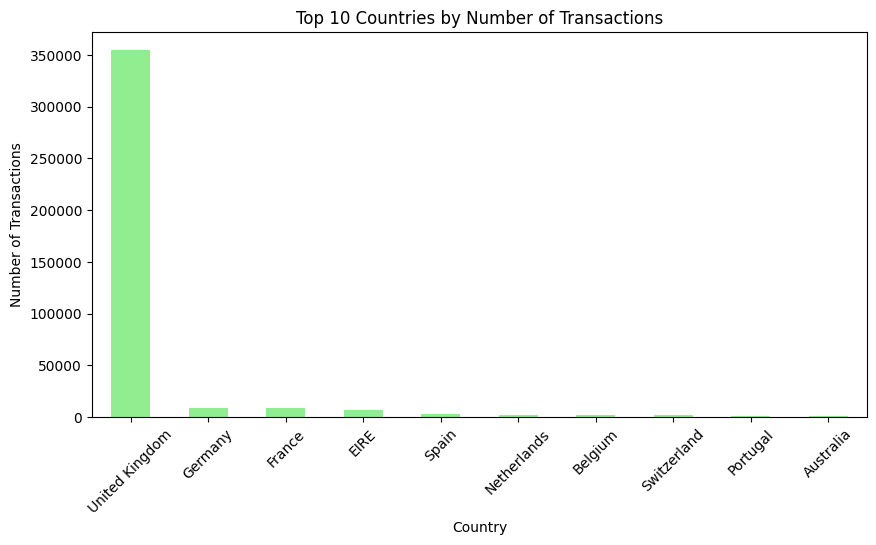

In [90]:
df['Country'].value_counts().head(10).plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

C:\Users\rayee\AppData\Local\Temp\ipykernel_8556\2174341629.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()['Quantity']


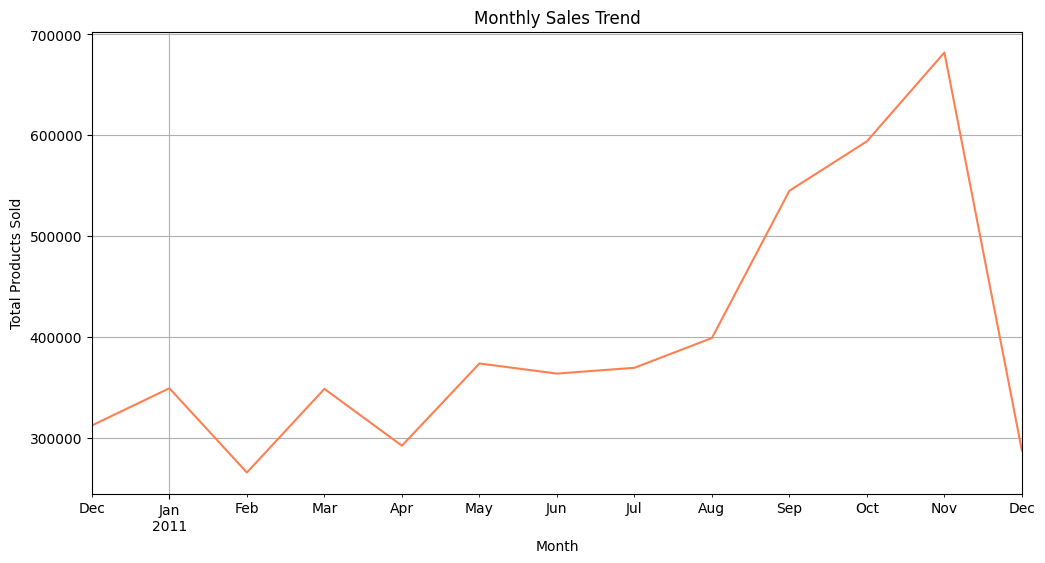

In [91]:
df.set_index('InvoiceDate', inplace=True)
monthly_sales = df.resample('M').sum()['Quantity']

monthly_sales.plot(figsize=(12,6), color='coral')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Products Sold')
plt.grid(True)
plt.show()

In [92]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for pickle


In [94]:
import pickle
with open('item_similarity.pkl','wb')as file:
    pickle.dump(item_similarity_df,file)

In [100]:
with open('item_similarity.pkl','rb') as file:
    loaded_similarity=pickle.load(file)
loaded_similarity.head(5)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
Description,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,1.000000,0.000000,0.000106,0.000494,0.000000,0.000000,0.031685,0.000000,0.000272,0.134742,...,0.0,0.002012,0.028527,0.002462,0.0,0.005989,0.0,0.039433,0.00000,0.001852
50'S CHRISTMAS GIFT BAG LARGE,0.000000,1.000000,0.009123,0.004511,0.000000,0.020504,0.016775,0.918930,0.145846,0.008422,...,0.0,0.001864,0.021446,0.011945,0.0,0.014968,0.0,0.010439,0.00000,0.031379
DOLLY GIRL BEAKER,0.000106,0.009123,1.000000,0.536172,0.728505,0.017890,0.005203,0.007484,0.002644,0.186663,...,0.0,0.000174,0.009784,0.367785,0.0,0.251604,0.0,0.455050,0.00036,0.015561
I LOVE LONDON MINI BACKPACK,0.000494,0.004511,0.536172,1.000000,0.705221,0.025421,0.001529,0.004645,0.007066,0.172236,...,0.0,0.001621,0.008273,0.353233,0.0,0.239391,0.0,0.453407,0.00000,0.016661
I LOVE LONDON MINI RUCKSACK,0.000000,0.000000,0.728505,0.705221,1.000000,0.000000,0.000000,0.000000,0.000000,0.213768,...,0.0,0.000000,0.000000,0.490886,0.0,0.330277,0.0,0.615980,0.00000,0.000000


In [137]:
from fuzzywuzzy import process
import pandas as pd

# Function to find similar product names using fuzzy matching
def find_similar_product(product_name, similarity_matrix, threshold=80):
    # Get a list of all product names
    product_names = similarity_matrix.columns.tolist()
    
    # Use fuzzy matching to find the closest matches
    matches = process.extract(product_name, product_names, limit=5)
    
    # Filter matches based on a similarity threshold
    similar_products = [match[0] for match in matches if match[1] >= threshold]
    
    if not similar_products:
        print(f"No similar products found for '{product_name}'")
        return None
    else:
        return similar_products

# Function to recommend similar products
def recommend_similar_products(product_name, n=5):
    # Find similar product names using fuzzy matching
    similar_products = find_similar_product(product_name, item_similarity_df)
    
    if not similar_products:
        print(f"No similar products found for '{product_name}'")
        return

    print(f"\nProducts similar to '{product_name}':")
    # Limit the recommendations to the top 'n' products
    for product in similar_products[:n]:
        print("-", product)

# Sample call
recommend_similar_products('I LOVE LONDON MINI RUCKSACK', 5)

c:\Users\rayee\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')



Products similar to 'I LOVE LONDON MINI RUCKSACK':
- I LOVE LONDON MINI RUCKSACK
- CARD I LOVE LONDON
- MINI JIGSAW PURDEY
- WALL ART BIG LOVE
- WRAP I LOVE LONDON


In [164]:
def recommend_function(product_name,similarity_matrix,top_n=5):
    product_name=product_name.strip().upper()
    if product_name not in similarity_matrix.columns:
        return "product not found or no similar product found in data set"
    similarity_score=similarity_matrix[product_name].sort_values(ascending=False)
    top_similar=similarity_score.iloc[1:top_n+1]
    return top_similar

In [165]:
recommend_function('WHITE METAL LANTERN',loaded_similarity,top_n=5)

Description
 50'S CHRISTMAS GIFT BAG LARGE    0.624077
 RED SPOT GIFT BAG LARGE          0.620879
LOVE HOT WATER BOTTLE             0.616835
EGG CUP HENRIETTA HEN CREAM       0.610485
WRAP, BILLBOARD FONTS DESIGN      0.600567
Name: WHITE METAL LANTERN, dtype: float64

In [169]:
recommend_function("50'S CHRISTMAS GIFT BAG LARGE",item_similarity_df,top_n=5)

Description
RED SPOT GIFT BAG LARGE          0.918930
50'S CHRISTMAS PAPER GIFT BAG    0.900243
EGG CUP HENRIETTA HEN CREAM      0.873472
WRAP, BILLBOARD FONTS DESIGN     0.858265
LOVE HOT WATER BOTTLE            0.854860
Name: 50'S CHRISTMAS GIFT BAG LARGE, dtype: float64